In [1]:
import random
import warnings

import numpy as np
import pandas as pd
from catboost import CatBoostClassifier
import sys
import os

python_dir = os.path.abspath('..')
sys.path.append(python_dir)

/Users/victorlandeau/Library/Caches/pypoetry/virtualenvs/bootcamp-2021-01-JvUDATpG-py3.7/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/Users/victorlandeau/Library/Caches/pypoetry/virtualenvs/bootcamp-2021-01-JvUDATpG-py3.7/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
import bootcamp_2021_01

In [3]:
from pilotis_io.directory_structure import dataset_raw_dir_path
from pilotis_io.local import LocalPandasApi
from pilotis_io.local.local_io_api import LocalIoApi

from bootcamp_2021_01.domain.feature_engineering import feature_engineering
from bootcamp_2021_01.domain.modeling.model_optimization import tune_model
from bootcamp_2021_01.domain.persistence.use_cases.models_persistence import UseCasesModelPersistence

pd.set_option("display.max_columns", 100)
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
WORK_DIR = '../../workdir'

MODEL_NAME = 'cat_boost'
USE_CASE_NAME = 'successful_startups'

# Load raw data for schema discovery

## Load data

In [5]:
io_api = LocalIoApi(WORK_DIR)
pandas_api = LocalPandasApi(io_api)

In [6]:
dataset_version = '2015-12'

invest_name = 'notpeter_investments'
invest_path = dataset_raw_dir_path(invest_name, dataset_version)

acq_name = 'notpeter_acquisitions'
acq_path = dataset_raw_dir_path(acq_name, dataset_version)

comp_name = 'notpeter_companies'
comp_path = dataset_raw_dir_path(comp_name, dataset_version)

In [7]:
dataset_version_bachelorarbeit_clean = '2013-12-cleaned'
orga_name = 'bachelorarbeit_organizations'
orga_path = dataset_raw_dir_path(orga_name, dataset_version_bachelorarbeit_clean)

orga_files = io_api.list_files_in_dir(orga_path)
organizations = pandas_api.load_pandas_dataset(orga_files)

In [8]:
vc_holy_grail_people_dataset_version = 'vc_holy_grail_cleaned'

vc_holy_grail_people_name = 'vc_holy_grail_people'
vc_holy_grail_people_path = dataset_raw_dir_path(vc_holy_grail_people_name, vc_holy_grail_people_dataset_version)

In [9]:
invest_files = io_api.list_files_in_dir(invest_path)
acq_files = io_api.list_files_in_dir(acq_path)
comp_files = io_api.list_files_in_dir(comp_path)
vc_holy_grail_people_files = io_api.list_files_in_dir(vc_holy_grail_people_path)

In [10]:
invest = pandas_api.load_pandas_dataset(invest_files, encoding='unicode_escape')
acq = pandas_api.load_pandas_dataset(acq_files, encoding='unicode_escape')
companies = pandas_api.load_pandas_dataset(comp_files, encoding='unicode_escape')
vc_holy_grail_people = pandas_api.load_pandas_dataset(vc_holy_grail_people_files)

/Users/victorlandeau/Library/Caches/pypoetry/virtualenvs/bootcamp-2021-01-JvUDATpG-py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: DtypeWarning: Columns (17,18,19,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  after removing the cwd from sys.path.


In [11]:
recent_invest = invest[invest.funded_at >= "2007-01-01"]

In [12]:
from datetime import date
from bootcamp_2021_01.domain.feature_engineering.target_definition import add_series_a_success_status

series_a_success_or_not_df = add_series_a_success_status(recent_invest, acq, companies, date(2015, 12, 3))

In [13]:
series_a_success_or_not_df.shape

(18865, 29)

In [14]:
series_a_success_or_not_df.head()

,company_permalink,company_name,company_category_list,company_country_code,company_state_code,company_region,company_city,investor_permalink,investor_name,investor_country_code,investor_state_code,investor_region,investor_city,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,funded_at_as_date,series_a,has_new_funding_round,is_acquired,status,country_code,region,city,first_funding_at,homepage_url,successful_series_a
company_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
( caravelo (,/organization/caravelo,( caravelo (,Information Technology|Online Travel,ESP,56,Barcelona,Barcelona,/organization/fundacin-jos-manuel-entrecanales,FundaciÃ³n JosÃ© Manuel Entrecanales,ESP,29,Madrid,Madrid,/funding-round/5d4ad8cc0a340dc61fd454ecb41aa581,venture,A,2012-01-01,NaN,2012-01-01,1,False,False,operating,ESP,Barcelona,Barcelona,2012-01-01,http://www.caravelo.com/,0
0-6.com,/organization/0-6-com,0-6.com,Curated Web,CHN,22,Beijing,Beijing,/organization/dt-capital-partners,DT Capital Partners,CHN,23,Shanghai,Shanghai,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,2008-03-19,2000000.0,2008-03-19,1,False,False,operating,CHN,Beijing,Beijing,2008-03-19,http://www.0-6.com,0
1-Page,/organization/the-one-page-company,1-Page,Career Management|Consumer Internet|Data Minin...,USA,CA,SF Bay Area,San Francisco,/organization/blumberg-capital,Blumberg Capital,USA,CA,SF Bay Area,San Francisco,/funding-round/09ef109fff739cfd26bb2aa1f222c4b6,venture,A,2013-11-07,1500000.0,2013-11-07,1,False,False,ipo,USA,SF Bay Area,San Francisco,2012-04-01,http://www.1-page.com,1
1-Page,/organization/the-one-page-company,1-Page,Career Management|Consumer Internet|Data Minin...,USA,CA,SF Bay Area,San Francisco,/organization/georgetown-alumni-angels,Georgetown Angels,USA,NY,New York City,New York,/funding-round/09ef109fff739cfd26bb2aa1f222c4b6,venture,A,2013-11-07,1500000.0,2013-11-07,1,False,False,ipo,USA,SF Bay Area,San Francisco,2012-04-01,http://www.1-page.com,1
1-Page,/organization/the-one-page-company,1-Page,Career Management|Consumer Internet|Data Minin...,USA,CA,SF Bay Area,San Francisco,/organization/rothenberg-ventures,Rothenberg Ventures,USA,CA,SF Bay Area,San Francisco,/funding-round/09ef109fff739cfd26bb2aa1f222c4b6,venture,A,2013-11-07,1500000.0,2013-11-07,1,False,False,ipo,USA,SF Bay Area,San Francisco,2012-04-01,http://www.1-page.com,1


In [15]:
series_a_train = series_a_success_or_not_df[series_a_success_or_not_df.funded_at < "2013-01"]
series_a_test = series_a_success_or_not_df[series_a_success_or_not_df.funded_at >= "2013-01"]
series_a_train.shape, series_a_test.shape

((13033, 29), (5832, 29))

In [16]:
x_train, y_train, _ = feature_engineering.prepare_inputs_for_machine_learning(series_a_train,
                                                                              organizations,
                                                                              vc_holy_grail_people)
x_test, y_test, _ = feature_engineering.prepare_inputs_for_machine_learning(series_a_test,
                                                                            organizations,
                                                                            vc_holy_grail_people)
len(y_train), len(y_test)

(13617, 6791)

In [17]:
cat_features_indexes = list(np.where(x_train.dtypes == object)[0])
cat_features_indexes

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15]

In [18]:
#best_params = tune_model(cat_features_indexes, x_train, y_train)
best_params = {}

In [19]:
classifier = CatBoostClassifier(cat_features=cat_features_indexes, **best_params)
classifier.fit(x_train, y_train)

Learning rate set to 0.031419
0:	learn: 0.6757021	total: 83.6ms	remaining: 1m 23s
1:	learn: 0.6595985	total: 106ms	remaining: 52.8s
2:	learn: 0.6437296	total: 128ms	remaining: 42.5s
3:	learn: 0.6294809	total: 151ms	remaining: 37.6s
4:	learn: 0.6126950	total: 175ms	remaining: 34.9s
5:	learn: 0.5978549	total: 202ms	remaining: 33.5s
6:	learn: 0.5808178	total: 219ms	remaining: 31s
7:	learn: 0.5663781	total: 249ms	remaining: 30.9s
8:	learn: 0.5546673	total: 266ms	remaining: 29.3s
9:	learn: 0.5391918	total: 294ms	remaining: 29.1s
10:	learn: 0.5245655	total: 317ms	remaining: 28.5s
11:	learn: 0.5115111	total: 342ms	remaining: 28.1s
12:	learn: 0.4995716	total: 365ms	remaining: 27.7s
13:	learn: 0.4932493	total: 388ms	remaining: 27.3s
14:	learn: 0.4864975	total: 416ms	remaining: 27.3s
15:	learn: 0.4784885	total: 439ms	remaining: 27s
16:	learn: 0.4680603	total: 463ms	remaining: 26.8s
17:	learn: 0.4597534	total: 487ms	remaining: 26.5s
18:	learn: 0.4522488	total: 508ms	remaining: 26.2s
19:	learn: 0.

166:	learn: 0.3036018	total: 4.27s	remaining: 21.3s
167:	learn: 0.3035205	total: 4.29s	remaining: 21.3s
168:	learn: 0.3033527	total: 4.32s	remaining: 21.2s
169:	learn: 0.3031954	total: 4.34s	remaining: 21.2s
170:	learn: 0.3027942	total: 4.37s	remaining: 21.2s
171:	learn: 0.3026154	total: 4.39s	remaining: 21.1s
172:	learn: 0.3024440	total: 4.42s	remaining: 21.1s
173:	learn: 0.3022897	total: 4.44s	remaining: 21.1s
174:	learn: 0.3021690	total: 4.46s	remaining: 21s
175:	learn: 0.3020233	total: 4.48s	remaining: 21s
176:	learn: 0.3019099	total: 4.51s	remaining: 21s
177:	learn: 0.3018079	total: 4.53s	remaining: 20.9s
178:	learn: 0.3016132	total: 4.55s	remaining: 20.9s
179:	learn: 0.3014328	total: 4.57s	remaining: 20.8s
180:	learn: 0.3013423	total: 4.59s	remaining: 20.8s
181:	learn: 0.3009074	total: 4.62s	remaining: 20.8s
182:	learn: 0.3008705	total: 4.64s	remaining: 20.7s
183:	learn: 0.3007058	total: 4.67s	remaining: 20.7s
184:	learn: 0.3006539	total: 4.7s	remaining: 20.7s
185:	learn: 0.30049

330:	learn: 0.2787724	total: 8.37s	remaining: 16.9s
331:	learn: 0.2786832	total: 8.4s	remaining: 16.9s
332:	learn: 0.2786202	total: 8.42s	remaining: 16.9s
333:	learn: 0.2784489	total: 8.45s	remaining: 16.8s
334:	learn: 0.2781021	total: 8.47s	remaining: 16.8s
335:	learn: 0.2779005	total: 8.49s	remaining: 16.8s
336:	learn: 0.2777042	total: 8.52s	remaining: 16.8s
337:	learn: 0.2775781	total: 8.54s	remaining: 16.7s
338:	learn: 0.2773817	total: 8.56s	remaining: 16.7s
339:	learn: 0.2773817	total: 8.57s	remaining: 16.6s
340:	learn: 0.2772897	total: 8.6s	remaining: 16.6s
341:	learn: 0.2770940	total: 8.63s	remaining: 16.6s
342:	learn: 0.2770077	total: 8.66s	remaining: 16.6s
343:	learn: 0.2769393	total: 8.68s	remaining: 16.6s
344:	learn: 0.2768313	total: 8.7s	remaining: 16.5s
345:	learn: 0.2767578	total: 8.72s	remaining: 16.5s
346:	learn: 0.2766530	total: 8.74s	remaining: 16.5s
347:	learn: 0.2764222	total: 8.77s	remaining: 16.4s
348:	learn: 0.2763123	total: 8.79s	remaining: 16.4s
349:	learn: 0.2

494:	learn: 0.2603691	total: 12.7s	remaining: 12.9s
495:	learn: 0.2602742	total: 12.7s	remaining: 12.9s
496:	learn: 0.2602268	total: 12.7s	remaining: 12.9s
497:	learn: 0.2601602	total: 12.8s	remaining: 12.9s
498:	learn: 0.2600124	total: 12.8s	remaining: 12.8s
499:	learn: 0.2599357	total: 12.8s	remaining: 12.8s
500:	learn: 0.2598273	total: 12.8s	remaining: 12.8s
501:	learn: 0.2597689	total: 12.9s	remaining: 12.8s
502:	learn: 0.2596815	total: 12.9s	remaining: 12.7s
503:	learn: 0.2594978	total: 12.9s	remaining: 12.7s
504:	learn: 0.2594268	total: 13s	remaining: 12.7s
505:	learn: 0.2592644	total: 13s	remaining: 12.7s
506:	learn: 0.2592128	total: 13s	remaining: 12.7s
507:	learn: 0.2591376	total: 13s	remaining: 12.6s
508:	learn: 0.2590013	total: 13.1s	remaining: 12.6s
509:	learn: 0.2588779	total: 13.1s	remaining: 12.6s
510:	learn: 0.2587956	total: 13.1s	remaining: 12.6s
511:	learn: 0.2587063	total: 13.2s	remaining: 12.6s
512:	learn: 0.2586053	total: 13.2s	remaining: 12.5s
513:	learn: 0.258489

654:	learn: 0.2460254	total: 17.1s	remaining: 9.01s
655:	learn: 0.2459258	total: 17.1s	remaining: 8.99s
656:	learn: 0.2458638	total: 17.2s	remaining: 8.96s
657:	learn: 0.2457151	total: 17.2s	remaining: 8.94s
658:	learn: 0.2456041	total: 17.2s	remaining: 8.91s
659:	learn: 0.2455638	total: 17.2s	remaining: 8.88s
660:	learn: 0.2455098	total: 17.3s	remaining: 8.86s
661:	learn: 0.2454877	total: 17.3s	remaining: 8.83s
662:	learn: 0.2454289	total: 17.3s	remaining: 8.81s
663:	learn: 0.2453822	total: 17.4s	remaining: 8.78s
664:	learn: 0.2452955	total: 17.4s	remaining: 8.75s
665:	learn: 0.2451973	total: 17.4s	remaining: 8.73s
666:	learn: 0.2451102	total: 17.4s	remaining: 8.7s
667:	learn: 0.2450458	total: 17.5s	remaining: 8.68s
668:	learn: 0.2449487	total: 17.5s	remaining: 8.65s
669:	learn: 0.2449046	total: 17.5s	remaining: 8.63s
670:	learn: 0.2448281	total: 17.5s	remaining: 8.6s
671:	learn: 0.2447955	total: 17.6s	remaining: 8.58s
672:	learn: 0.2447191	total: 17.6s	remaining: 8.55s
673:	learn: 0.

813:	learn: 0.2351226	total: 21.3s	remaining: 4.87s
814:	learn: 0.2350594	total: 21.4s	remaining: 4.85s
815:	learn: 0.2349840	total: 21.4s	remaining: 4.82s
816:	learn: 0.2349339	total: 21.4s	remaining: 4.8s
817:	learn: 0.2348943	total: 21.4s	remaining: 4.77s
818:	learn: 0.2348509	total: 21.5s	remaining: 4.74s
819:	learn: 0.2348399	total: 21.5s	remaining: 4.72s
820:	learn: 0.2348111	total: 21.5s	remaining: 4.69s
821:	learn: 0.2347466	total: 21.6s	remaining: 4.67s
822:	learn: 0.2346992	total: 21.6s	remaining: 4.64s
823:	learn: 0.2346185	total: 21.6s	remaining: 4.62s
824:	learn: 0.2345738	total: 21.6s	remaining: 4.59s
825:	learn: 0.2344934	total: 21.7s	remaining: 4.57s
826:	learn: 0.2344042	total: 21.7s	remaining: 4.54s
827:	learn: 0.2343754	total: 21.8s	remaining: 4.52s
828:	learn: 0.2343375	total: 21.8s	remaining: 4.49s
829:	learn: 0.2343068	total: 21.8s	remaining: 4.47s
830:	learn: 0.2342878	total: 21.8s	remaining: 4.44s
831:	learn: 0.2342593	total: 21.9s	remaining: 4.42s
832:	learn: 0

975:	learn: 0.2251957	total: 26.2s	remaining: 645ms
976:	learn: 0.2251235	total: 26.3s	remaining: 618ms
977:	learn: 0.2250670	total: 26.3s	remaining: 591ms
978:	learn: 0.2250064	total: 26.3s	remaining: 565ms
979:	learn: 0.2249639	total: 26.4s	remaining: 538ms
980:	learn: 0.2249002	total: 26.4s	remaining: 511ms
981:	learn: 0.2247679	total: 26.4s	remaining: 484ms
982:	learn: 0.2246486	total: 26.5s	remaining: 458ms
983:	learn: 0.2245789	total: 26.5s	remaining: 431ms
984:	learn: 0.2245092	total: 26.5s	remaining: 404ms
985:	learn: 0.2243646	total: 26.6s	remaining: 377ms
986:	learn: 0.2242970	total: 26.6s	remaining: 350ms
987:	learn: 0.2242165	total: 26.6s	remaining: 323ms
988:	learn: 0.2241732	total: 26.6s	remaining: 296ms
989:	learn: 0.2241216	total: 26.7s	remaining: 269ms
990:	learn: 0.2240207	total: 26.7s	remaining: 243ms
991:	learn: 0.2239567	total: 26.7s	remaining: 216ms
992:	learn: 0.2238746	total: 26.8s	remaining: 189ms
993:	learn: 0.2238155	total: 26.8s	remaining: 162ms
994:	learn: 

In [20]:
x_test

,has_homepage_url,nb_days_since_first_funding,country_code,region,city,investor_country_code,investor_region,investor_city,investor_global_experience,company_first_category,company_second_category,company_third_category,company_fourth_category,company_fifth_category,number_of_days_since_first_january_70,investor_experience_in_first_category,is_investor_country_same_as_company_s,has_facebook,has_twitter,has_linkdedin,count_employee_in_crunchbase,min_founded_organizations,min_portfolio_companies,min_investments,min_partner_investments,min_news_articles,min_lead_investments,min_exits,min_events,max_founded_organizations,max_portfolio_companies,max_investments,max_partner_investments,max_news_articles,max_lead_investments,max_exits,max_events,mean_founded_organizations,mean_portfolio_companies,mean_investments,mean_partner_investments,mean_news_articles,mean_lead_investments,mean_exits,mean_events
1-Page,1,585,USA,SF Bay Area,San Francisco,USA,SF Bay Area,San Francisco,Blumberg Capital,Career Management,Consumer Internet,Data Mining,Human Resources,Marketplaces,16016,Blumberg Capital-Career Management,1,1,1,1,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1-Page,1,585,USA,SF Bay Area,San Francisco,USA,New York City,New York,Georgetown Angels,Career Management,Consumer Internet,Data Mining,Human Resources,Marketplaces,16016,Georgetown Angels-Career Management,1,1,1,1,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1-Page,1,585,USA,SF Bay Area,San Francisco,USA,SF Bay Area,San Francisco,Rothenberg Ventures,Career Management,Consumer Internet,Data Mining,Human Resources,Marketplaces,16016,Rothenberg Ventures-Career Management,1,1,1,1,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1-Page,1,585,USA,SF Bay Area,San Francisco,USA,Dallas,Dallas,Satori Capital,Career Management,Consumer Internet,Data Mining,Human Resources,Marketplaces,16016,Satori Capital-Career Management,1,1,1,1,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1-Page,1,585,USA,SF Bay Area,San Francisco,Unknown,Unknown,Unknown,Talent Equity Ventures,Career Management,Consumer Internet,Data Mining,Human Resources,Marketplaces,16016,Talent Equity Ventures-Career Management,0,1,1,1,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yepme.com,1,252,IND,New Delhi,Gurgaon,USA,SF Bay Area,Palo Alto,Capricorn Investment Group,Brand Marketing,Online Shopping,Product Design,Unknown,Unknown,16444,Capricorn Investment Group-Brand Marketing,0,0,0,0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
yepme.com,1,252,IND,New Delhi,Gurgaon,MUS,Mauritius,Port Louis Town,Helion Venture Partners,Brand Marketing,Online Shopping,Product Design,Unknown,Unknown,16444,Helion Venture Partners-Brand Marketing,0,0,0,0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
yepme.com,1,252,IND,New Delhi,Gurgaon,USA,San Diego,San Diego,J.S. Oliver Capital Management,Brand Marketing,Online Shopping,Product Design,Unknown,Unknown,16444,J.S. Oliver Capital Management-Brand Marketing,0,0,0,0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
yepme.com,1,252,IND,New Delhi,Gurgaon,SGP,Singapore,Singapore,TC Capital,Brand Marketing,Online Shopping,Product Design,Unknown,Unknown,16444,TC Capital-Brand Marketing,0,0,0,0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0

In [21]:
classifier.predict_proba(x_test)

array([[0.58379309, 0.41620691],
       [0.68319299, 0.31680701],
       [0.67445439, 0.32554561],
       ...,
       [0.74806177, 0.25193823],
       [0.79155802, 0.20844198],
       [0.65395127, 0.34604873]])

## Model export

In [22]:
models_persistence = UseCasesModelPersistence(io_api, USE_CASE_NAME, MODEL_NAME)

In [23]:
models_persistence.save_sklearn_model(classifier, run_id='run_notebook')

## Model analysis

In [24]:
classifier.score(x_train, y_train), \
classifier.score(x_test, y_test)

(0.9804655944774914, 0.710057428950081)

In [25]:
test_predictions = classifier.predict_proba(x_test)[:, 1].reshape(-1, 1)
test_predictions.shape

(6791, 1)

In [26]:
from sklearn.metrics import auc, roc_curve

x_coord_roc, y_coord_roc, thresholds = roc_curve(y_test, test_predictions)
auc(x_coord_roc, y_coord_roc)

0.7301837007348029

In [27]:
predictions_vs_reality = x_test.assign(predictions=test_predictions,
                                       reality=y_test)

In [28]:
predictions_vs_reality.head(30)

,has_homepage_url,nb_days_since_first_funding,country_code,region,city,investor_country_code,investor_region,investor_city,investor_global_experience,company_first_category,company_second_category,company_third_category,company_fourth_category,company_fifth_category,number_of_days_since_first_january_70,investor_experience_in_first_category,is_investor_country_same_as_company_s,has_facebook,has_twitter,has_linkdedin,count_employee_in_crunchbase,min_founded_organizations,min_portfolio_companies,min_investments,min_partner_investments,min_news_articles,min_lead_investments,min_exits,min_events,max_founded_organizations,max_portfolio_companies,max_investments,max_partner_investments,max_news_articles,max_lead_investments,max_exits,max_events,mean_founded_organizations,mean_portfolio_companies,mean_investments,mean_partner_investments,mean_news_articles,mean_lead_investments,mean_exits,mean_events,predictions,reality
1-Page,1,585,USA,SF Bay Area,San Francisco,USA,SF Bay Area,San Francisco,Blumberg Capital,Career Management,Consumer Internet,Data Mining,Human Resources,Marketplaces,16016,Blumberg Capital-Career Management,1,1,1,1,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.416207,1
1-Page,1,585,USA,SF Bay Area,San Francisco,USA,New York City,New York,Georgetown Angels,Career Management,Consumer Internet,Data Mining,Human Resources,Marketplaces,16016,Georgetown Angels-Career Management,1,1,1,1,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.316807,1
1-Page,1,585,USA,SF Bay Area,San Francisco,USA,SF Bay Area,San Francisco,Rothenberg Ventures,Career Management,Consumer Internet,Data Mining,Human Resources,Marketplaces,16016,Rothenberg Ventures-Career Management,1,1,1,1,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.325546,1
1-Page,1,585,USA,SF Bay Area,San Francisco,USA,Dallas,Dallas,Satori Capital,Career Management,Consumer Internet,Data Mining,Human Resources,Marketplaces,16016,Satori Capital-Career Management,1,1,1,1,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.299676,1
1-Page,1,585,USA,SF Bay Area,San Francisco,Unknown,Unknown,Unknown,Talent Equity Ventures,Career Management,Consumer Internet,Data Mining,Human Resources,Marketplaces,16016,Talent Equity Ventures-Career Management,0,1,1,1,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.266164,1
1-Page,1,585,USA,SF Bay Area,San Francisco,Unknown,Unknown,Unknown,TMT Investments,Career Management,Consumer Internet,Data Mining,Human Resources,Marketplaces,16016,TMT Investments-Career Management,0,1,1,1,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.296734,1
1006.tv,1,731,CHN,Beijing,Beijing,CHN,Beijing,Beijing,Matrix Partners China,Games,Media,Unknown,Unknown,Unknown,15706,Matrix Partners China-Games,1,0,0,0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.329858,1
1World Online,1,0,USA,SF Bay Area,San Jose,Unknown,Unknown,Unknown,Alex Fedosseev,Analytics,Big Data,Enterprise Software,Market Research,Mobile,15888,Alex Fedosseev-Analytics,0,1,1,1,1.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,0.973922,0
1jiajie,1,0,CHN,Beijing,Beijing,Unknown,Unknown,Unknown,Tencent Industry Win-Win Fund,E-Commerce,Unknown,Unknown,Unknown,Unknown,15949,Tencent Industry Win-Win Fund-E-Commerce,0,0,0,0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.323210,0
21 Inc,1,0,USA,SF Bay Area,San Francisco,USA,New York City,New York,Winklevoss

In [29]:
predictions_vs_reality.groupby("predictions")["reality"].value_counts()

predictions  reality
0.000381     0          2
0.000603     0          1
0.000737     0          2
0.000805     0          1
0.000823     0          2
                       ..
0.999286     1          1
0.999345     1          1
0.999450     1          1
0.999561     1          1
0.999571     1          1
Name: reality, Length: 5908, dtype: int64

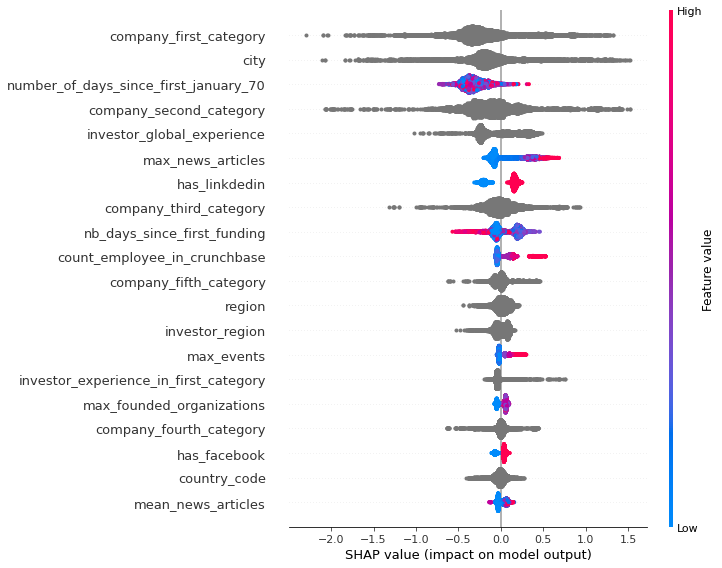

In [30]:
import shap

explainer = shap.TreeExplainer(classifier)
shap_values = explainer.shap_values(x_test)

shap.summary_plot(shap_values, x_test)

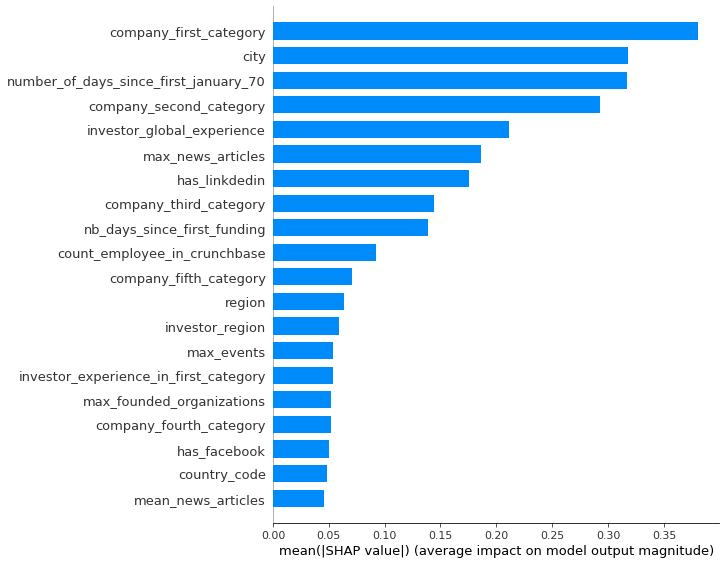

In [31]:
shap.summary_plot(shap_values, x_test, plot_type="bar")

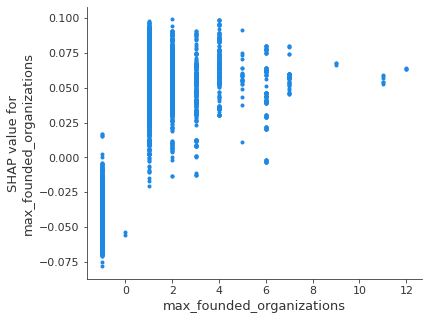

In [32]:
shap.dependence_plot("max_founded_organizations", shap_values, x_test,
                     interaction_index=None)

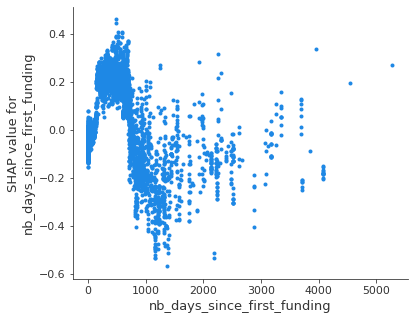

In [33]:
shap.dependence_plot("nb_days_since_first_funding", shap_values, x_test,
                     interaction_index=None)

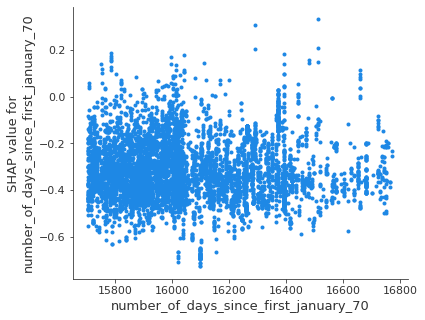

In [34]:
shap.dependence_plot("number_of_days_since_first_january_70", shap_values, x_test,
                     interaction_index=None)

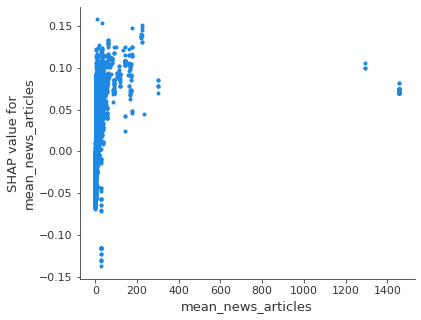

In [35]:
shap.dependence_plot("mean_news_articles", shap_values, x_test,
                     interaction_index=None)

In [36]:
shap.initjs()
sample_index = random.randint(0, len(x_test))

shap.force_plot(explainer.expected_value,
                shap_values[sample_index, :],
                x_test.iloc[sample_index, :])